In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Example of using numpy, pandas, and matplotlib

## Creating dataframe

In [2]:
df = pd.DataFrame(columns=['A', 'B', 'C'])

for col in df.columns:
    df[col] = np.random.lognormal(size=1000)

df['D'] = df['A'] * df['B']

df.head()

,A,B,C,D
0,0.443424,1.662853,0.199477,0.737348
1,1.339605,0.337582,3.061318,0.452227
2,0.462118,1.174270,5.075595,0.542652
3,4.331991,0.312787,0.517885,1.354989
4,1.453911,1.280009,0.509166,1.861018


## Taking the log, plotting the results

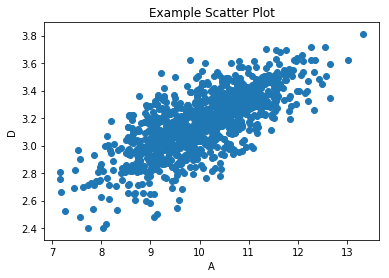

In [3]:
# Try out square rooting D

df_mod = np.log(df) + 10
df_mod['D'] = np.sqrt(df_mod['D'])

plt.scatter(df_mod['A'], df_mod['D'])
plt.xlabel('A')
plt.ylabel('D')
plt.title('Example Scatter Plot')
plt.show()

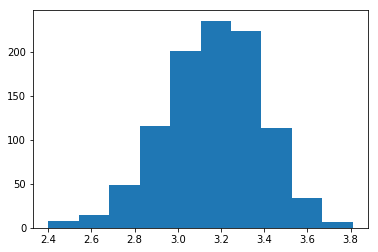

In [4]:
plt.hist(df_mod['D'])
plt.show()

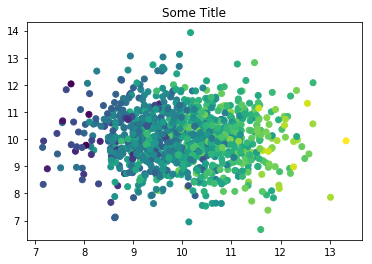

In [5]:
plt.scatter(df_mod['A'], df_mod['C'], c=df_mod['D'])
plt.title('Some Title')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_mod[['A', 'C']], df_mod['D'])

## Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

line = LinearRegression()

line.fit(X_train, Y_train)

print('Train score: ', line.score(X_train, Y_train))

print('Test score: ', line.score(X_test, Y_test))


Train score:  0.5131851652840451
Test score:  0.5365571856936683


In [8]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)

lasso.fit(X_train, Y_train)

print('Train score: ', lasso.score(X_train, Y_train))

print('Test score: ', lasso.score(X_test, Y_test))

Train score:  0.5109608884319521
Test score:  0.5325732791649826
